In [1]:
# Import numpy and matplotlib

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# generate random data-set

np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3 * X + (np.random.rand(100, 1)-0.5)

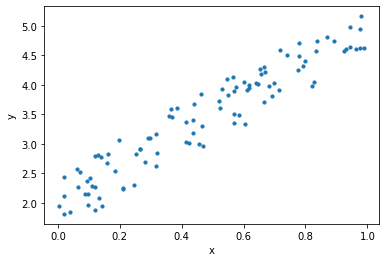

In [2]:
# Visualize the dataset
plt.scatter(X,y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# y = W0 + X1W1 + X2W2 + ... + XnWn
# y = W0 + X1W1 
# y = 1W0 + X1W1

In [3]:
y.shape

(100, 1)

In [4]:
# Add a column of ones to X (interception data)
X = np.c_[np.ones((X.shape[0], 1)), X]


# Store number of features (n_feature)
n_feautres = X.shape[1]

In [5]:
# Initialize a list to store losses during training
losses = []

# Initialize weights
weights = np.zeros((n_feautres, 1))

In [6]:
# Set learning rate to 0.00005 (lr)
lr = 0.0005

# Set number of epochs to 100 (n_iterations)
n_iterations = 10000

Train the model

In [7]:
# Iterate over the number of iterations
for _ in range(n_iterations):
    # Predict the output
    y_pred = np.dot(X, weights)
    # AKA X[0]weights[0] + X[1] * weights[1]
    
    # Calculate the residuals (residuals = y_pred - y)
    residuals = y_pred - y #pontok egyenestol valo tavolsaga

    # Calculate the gradient
    gradient_vector = np.dot(X.T, residuals)
    #mennyit kene valtoztatni az egyenesen hogy javuljon

    # Store loss (summ of residuals squared)
    losses.append(np.sum((residuals ** 2)))

    # Update the weights
    weights -=lr*gradient_vector


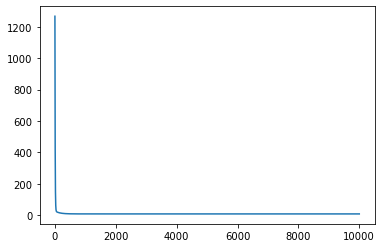

In [8]:
# Show losses
plt.plot(losses)

Evaluate the model

In [9]:
# Predict the y for all X values
y_pred = np.dot(X, weights)



# Implement 'mean squared error' function:
# Given y and y_pred
# Calculate the squared differences between y and y_pred
# Return the mean of the squared differences

def mean_squared_error_ours(y, y_pred):
    difference = 0
    for i in range(len(y)):
        store = y[i]-y_pred[i]
        difference = difference + (store ** 2)
    difference = difference / len(y)
    return difference


# Calculate the mean squared error
# Ours
print(mean_squared_error_ours(y, y_pred))


[0.07623325]


In [10]:
# Sklearn
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

0.07623324582875007

Visualize the model

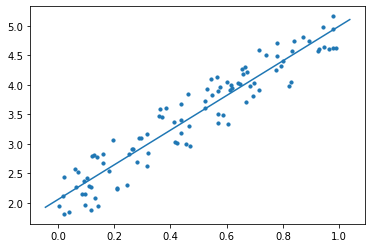

In [11]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals)

plt.scatter(X[:,1:],y,s=10)
abline(slope=weights[1], intercept=weights[0])

In [12]:
# Compare our mean_squared_error to sklearn

Use the model to predict an example value

In [13]:
test_value = 0.5
print(np.dot([1,test_value], weights))
print(test_value * weights[1] + weights[0])

[3.52635555]
[3.52635555]


OOP Aproach

In [14]:
# import linear model class
from linear_regression import LinearRegression

# Change jupyter settings to reload dependencies on change
%load_ext autoreload
%autoreload 2

In [15]:
# Initialize a LinearRegression object

regression = LinearRegression(lr = 0.005, limit=200)
# Fit the model
regression.fit(X, y)


# Predict the y for all X values
y_pred = regression.predict(X)
print(y_pred)
# Evaluate the model
mean_squared_error_ours(y, y_pred)
plt.plot(regression.losses)

Initializing Linear Regression
early stop
Model has been trained
None


TypeError: 'NoneType' object is not subscriptable